In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from IPython.display import Image
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
accuracy, global_acc = {}, {}

In [12]:
def add_stat(name, model):
    accuracy[name] = accuracy_score(model.predict(X_test), y_test)
    global_acc[name] = accuracy_score(model.predict(X), y)

## Decision Tree

In [13]:
y = data['quality']
X = data.drop(['quality'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=42
                                                    )

In [15]:
model = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': np.arange(4, 7),
    'min_samples_leaf' : np.arange(10, 20),
    'max_features' : np.arange(5, 12)
}

grid_search = GridSearchCV(model, params, 
                           n_jobs=-1, cv=3,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([4, 5, 6]),
                         '

In [16]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 15},
 0.5981425895995279)

In [17]:
decision_tree = DecisionTreeClassifier(max_depth=5, 
                                       max_features=10, 
                                       min_samples_leaf=15)

In [18]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
add_stat("Decision Tree", decision_tree)

## graph Decision Tree

In [21]:
graph = DecisionTreeClassifier(max_depth=2)

In [22]:
graph.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
export_graphviz(graph, feature_names=data.columns[:-1], out_file='tree.dot', filled=True)

In [25]:
!dot -Tpng 'tree.dot' -o 'tree.png'

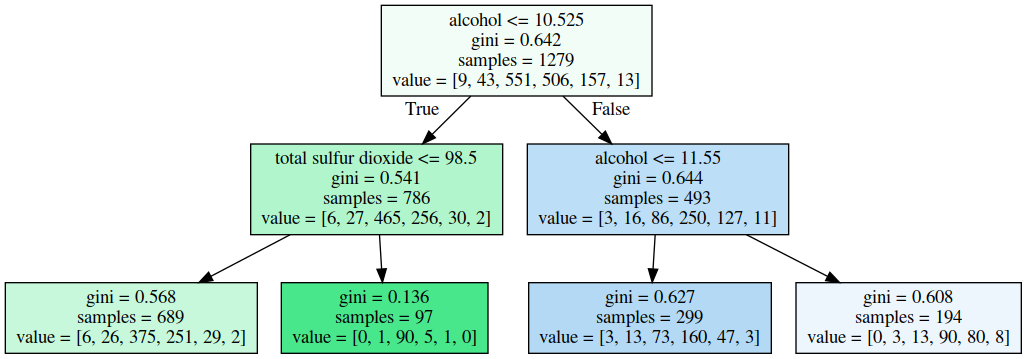

In [26]:
Image(filename='tree.png')

## Logistic Regression

In [27]:
model = LogisticRegression(random_state=42,
                          n_jobs=-1)

params = {
    'C': np.linspace(0, 1, 11)
}

grid_search = GridSearchCV(model, params, 
                           n_jobs=-1, cv=3,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [28]:
grid_search.best_params_, grid_search.best_score_

({'C': 1.0}, 0.5840764074428355)

In [29]:
logis = LogisticRegression(C=0.8, random_state=42, n_jobs=-1)

In [30]:
logis.fit(X_train, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [31]:
add_stat("Logistic Regression", logis)

## Linear Regression

In [32]:
linear = LinearRegression(n_jobs=-1).fit(X_train, y_train)

In [27]:
pred = linear.predict(X_test)
line_acc = accuracy_score(np.around(pred), y_test) 
line_acc

0.571875

In [34]:
accuracy['Linear Regression'] = accuracy_score(np.around(linear.predict(X_test)), y_test)
global_acc['Linear Regression'] = accuracy_score(np.around(linear.predict(X)), y)

## k Neighbors

In [37]:
model = KNeighborsClassifier(n_jobs=-1)

params = {
    'n_neighbors': np.arange(2, 21)
}

grid_search = GridSearchCV(model, params, 
                           n_jobs=-1, cv=3,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [38]:
grid_search.best_params_, grid_search.best_score_

({'n_neighbors': 17}, 0.5355795978054116)

In [39]:
neigh = KNeighborsClassifier(n_jobs=-1, n_neighbors=17).fit(X_train, y_train)

In [40]:
add_stat("k Neighbors", neigh)

## Random Forest

In [51]:
model = RandomForestClassifier(n_jobs=-1,
                              random_state=42)

params = {
    'max_depth': np.arange(9, 12),
    'min_samples_leaf' : np.arange(1, 3),
    'max_features' : np.arange(2, 5),
    'n_estimators': np.arange(100, 110)
}

grid_search = GridSearchCV(model, params, 
                           n_jobs=-1, cv=3,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [52]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 10,
  'max_features': 3,
  'min_samples_leaf': 1,
  'n_estimators': 104},
 0.672424345709961)

In [53]:
random_forest = RandomForestClassifier(n_jobs=-1,
                                       random_state=42,
                                       max_depth=10,
                                       max_features=3,
                                       min_samples_leaf=1,
                                       n_estimators=4)

In [54]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [55]:
add_stat("Random Forest", random_forest)

## Gradient Boosting

In [70]:
model = GradientBoostingClassifier(random_state=42,
                                  max_depth=5,
                                  min_samples_leaf=1,
                                  max_features=9)

params = {
    'n_estimators': np.arange(40, 60)
}

grid_search = GridSearchCV(model, params, 
                           n_jobs=-1, cv=3,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features=9,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
            

In [71]:
grid_search.best_params_, grid_search.best_score_

({'n_estimators': 49}, 0.6638208119390294)

In [72]:
grad_boost = GradientBoostingClassifier(random_state=42,
                                      max_depth=5,
                                      min_samples_leaf=1,
                                      max_features=9,
                                      n_estimators=49)

In [73]:
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=49,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
add_stat('Gradient Boosting', grad_boost)

## Summary

In [83]:
accuracy = pd.Series(accuracy)
global_acc = pd.Series(global_acc)
data = pd.DataFrame({'accuracy': accuracy, 'global accuracy': global_acc})
data

,accuracy,global accuracy
Decision Tree,0.546875,0.634772
Logistic Regression,0.546875,0.579737
Linear Regression,0.571875,0.590369
k Neighbors,0.465625,0.549093
Random Forest,0.612500,0.818637
Gradient Boosting,0.662500,0.912445


In [90]:
data.sort_values(by=['accuracy'], ascending=False)

,accuracy,global accuracy
Gradient Boosting,0.662500,0.912445
Random Forest,0.612500,0.818637
Linear Regression,0.571875,0.590369
Decision Tree,0.546875,0.634772
Logistic Regression,0.546875,0.579737
k Neighbors,0.465625,0.549093


In [91]:
data.sort_values(by=['global accuracy'], ascending=False)

,accuracy,global accuracy
Gradient Boosting,0.662500,0.912445
Random Forest,0.612500,0.818637
Decision Tree,0.546875,0.634772
Linear Regression,0.571875,0.590369
Logistic Regression,0.546875,0.579737
k Neighbors,0.465625,0.549093


Best Model is Gradient Boosting with 66% accuracy score on test data and 91 accuracy on all data